In [169]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import Logit
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.learning_curve import learning_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Exercise 6.1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

Exercise 6.2

For each, draw the Precision-Recall curve, ROC curve and calculate the AUC.

In [170]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", na_values=['?'], header=None)

In [171]:
df.columns = ["Class-Name", "handicapped-infants", "water-project-cost-sharing", 
              "adoption-of-the-budget-resolution", "physician-fee-freeze", "el-salvador-aid",
             "religious-groups-in-schools", "anti-satellite-test-ban", "aid-to-nicaraguan-contras",
             "mx-missile", "immigration", "synfuels-corporation-cutback", "education-spending",
             "superfund-right-to-sue", "crime", "duty-free-exports", "export-administration-act-south-africa"]

In [172]:
df= df.replace(to_replace='y', value=float(1))
df= df.replace(to_replace='n', value=float(0))
df2=df.iloc[:,1:]
df2.apply(lambda x: x.fillna(x.mean(), inplace=True), axis=0)
df3=df.iloc[:,0]
df4 = pd.concat([df3, df2], axis=1)
df4

,Class-Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.362319,1.000000,1.000000,1.000000,0.000000,1.000000
1,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812689
2,democrat,0.44208,1.000000,1.000000,0.417453,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
3,democrat,0.00000,1.000000,1.000000,0.000000,0.504762,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
4,democrat,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.423267,1.000000,1.000000,1.000000,1.000000
5,democrat,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
6,democrat,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.509756,1.000000,1.000000,1.000000
7,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.427518,1.000000
8,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
9,democrat,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.427518,0.812689


In [173]:
y=df4.iloc[:,0]
y= y.replace(to_replace='republican', value=float(1))
y=y.replace(to_replace='democrat', value=float(0))
X=df4.iloc[:,1:]

In [174]:
knn = KNeighborsClassifier()
k_range = list(range(1,31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X,y)
grid.best_params_

{'n_neighbors': 4}

In [175]:
print ("KNN scores")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
#accuracy - correct predictions divided by total predictions.
print("Accuracy:", accuracy)
precision = metrics.precision_score(y_test, y_pred_test)
# precision - instances you correctly predicted positive divided by the total number of predicted positives
print("Precision:", precision)
recall = metrics.recall_score(y_test, y_pred_test)
#recall - instances you correctly predicted positive divided by the total number of actual positives
print("Recall score:", recall)
#f1- balancing precision vs recall
f1 = metrics.f1_score(y_test, y_pred_test)
print("F1_score:", f1)

KNN scores
Accuracy: 0.900763358779
Precision: 0.901960784314
Recall score: 0.851851851852
F1_score: 0.87619047619


In [176]:
pred_proba = knn.predict_proba(X_test)
pred_proba

array([[ 0.25,  0.75],
       [ 0.  ,  1.  ],
       [ 0.75,  0.25],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.75,  0.25],
       [ 0.75,  0.25],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.25,  0.75],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.5 ,  0.5 ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.

In [177]:
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[:,1])

In [178]:
precision

array([ 0.41221374,  0.85      ,  0.89473684,  0.90196078,  0.95652174,  1.        ])

In [179]:
recall

array([ 1.        ,  0.94444444,  0.94444444,  0.85185185,  0.81481481,  0.        ])

In [180]:
thresholds

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

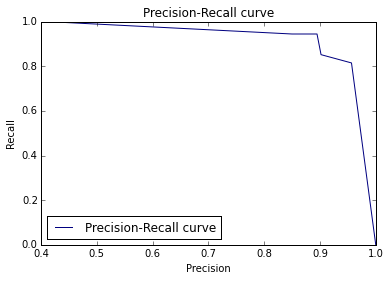

In [181]:
# Plot Precision-Recall curve

plt.plot(precision, recall, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

AUC 0.950096200096


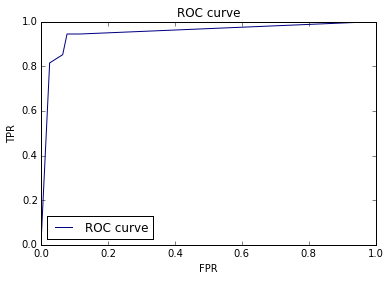

In [182]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
plt.plot(fpr, tpr, color='navy',
         label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc="lower left")
x = auc(fpr, tpr)
print ("AUC", x)

In [183]:
print ("Logistic Regression scores")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
#accuracy - correct predictions divided by total predictions.
print("Accuracy:", accuracy)
precision = metrics.precision_score(y_test, y_pred_test)
# precision - instances you correctly predicted positive divided by the total number of predicted positives
print("Precision:", precision)
recall = metrics.recall_score(y_test, y_pred_test)
#recall - instances you correctly predicted positive divided by the total number of actual positives
print("Recall score:", recall)
#f1- balancing precision vs recall
f1 = metrics.f1_score(y_test, y_pred_test)
print("F1_score:", f1)

Logistic Regression scores
Accuracy: 0.93893129771
Precision: 0.96
Recall score: 0.888888888889
F1_score: 0.923076923077


In [184]:
pred_proba = logreg.predict_proba(X_test)
pred_proba
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[:,1])

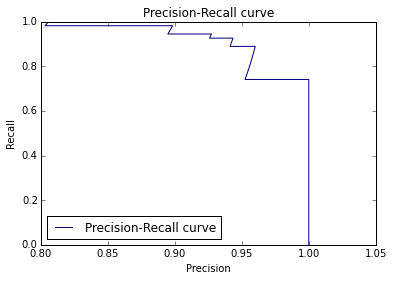

In [185]:
# Plot Precision-Recall curve

plt.plot(precision, recall, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

AUC 0.987734487734


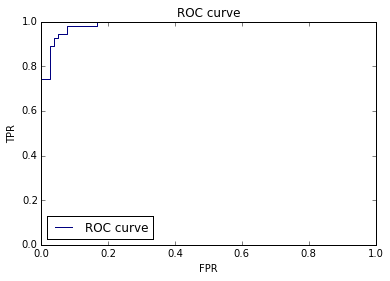

In [186]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
plt.plot(fpr, tpr, color='navy',
         label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc="lower left")
x = auc(fpr, tpr)
print ("AUC", x)

In [187]:
print ("GaussianNB scores")
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
alg=GaussianNB()
alg.fit(X_train, y_train)
y_pred_test = alg.predict(X_test)
accuracy= metrics.accuracy_score(y_test, y_pred_test)
#accuracy - correct predictions divided by total predictions.
print("Accuracy:", accuracy)
precision = metrics.precision_score(y_test, y_pred_test)
# precision - instances you correctly predicted positive divided by the total number of predicted positives
print("Precision:", precision)
recall = metrics.recall_score(y_test, y_pred_test)
#recall - instances you correctly predicted positive divided by the total number of actual positives
print("Recall score:", recall)
#f1- balancing precision vs recall
f1 = metrics.f1_score(y_test, y_pred_test)
print("F1_score:", f1)

GaussianNB scores
Accuracy: 0.93893129771
Precision: 0.979166666667
Recall score: 0.87037037037
F1_score: 0.921568627451


In [188]:
pred_proba = alg.predict_proba(X_test)
pred_proba
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[:,1])

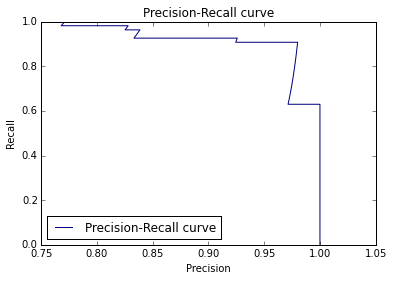

In [189]:
# Plot Precision-Recall curve

plt.plot(precision, recall, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

AUC 0.984126984127


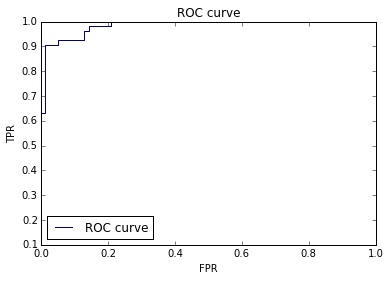

In [190]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
plt.plot(fpr, tpr, color='navy',
         label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc="lower left")
x = auc(fpr, tpr)
print ("AUC", x)

In [191]:
print ("Decision Tree Classifier")
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
alg=DecisionTreeClassifier()
alg.fit(X_train, y_train)
y_pred_test = alg.predict(X_test)
accuracy= metrics.accuracy_score(y_test, y_pred_test)
#accuracy - correct predictions divided by total predictions.
print("Accuracy:", accuracy)
precision = metrics.precision_score(y_test, y_pred_test)
# precision - instances you correctly predicted positive divided by the total number of predicted positives
print("Precision:", precision)
recall = metrics.recall_score(y_test, y_pred_test)
#recall - instances you correctly predicted positive divided by the total number of actual positives
print("Recall score:", recall)
#f1- balancing precision vs recall
f1 = metrics.f1_score(y_test, y_pred_test)
print("F1_score:", f1)

Decision Tree Classifier
Accuracy: 0.931297709924
Precision: 0.941176470588
Recall score: 0.888888888889
F1_score: 0.914285714286


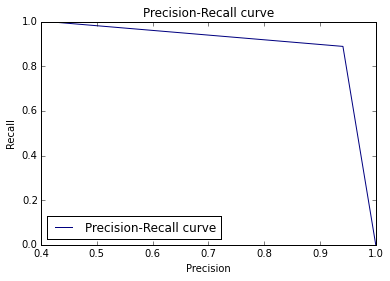

In [192]:
pred_proba = alg.predict_proba(X_test)
pred_proba
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[:,1])

# Plot Precision-Recall curve

plt.plot(precision, recall, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

AUC 0.924963924964


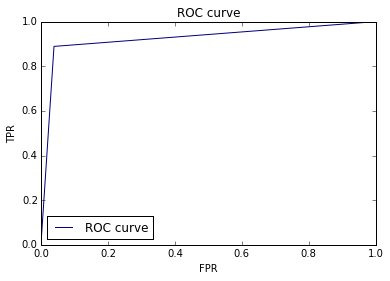

In [193]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
plt.plot(fpr, tpr, color='navy',
         label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc="lower left")
x = auc(fpr, tpr)
print ("AUC", x)

In [194]:
print ("Random Forest scores")
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
alg=RandomForestClassifier()
alg.fit(X_train, y_train)
y_pred_test = alg.predict(X_test)
accuracy= metrics.accuracy_score(y_test, y_pred_test)
#accuracy - correct predictions divided by total predictions.
print("Accuracy:", accuracy)
precision = metrics.precision_score(y_test, y_pred_test)
# precision - instances you correctly predicted positive divided by the total number of predicted positives
print("Precision:", precision)
recall = metrics.recall_score(y_test, y_pred_test)
#recall - instances you correctly predicted positive divided by the total number of actual positives
print("Recall score:", recall)
#f1- balancing precision vs recall
f1 = metrics.f1_score(y_test, y_pred_test)
print("F1_score:", f1)

Random Forest scores
Accuracy: 0.946564885496
Precision: 0.979591836735
Recall score: 0.888888888889
F1_score: 0.932038834951


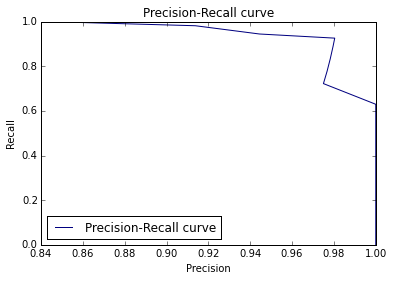

In [195]:
pred_proba = alg.predict_proba(X_test)
pred_proba
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[:,1])

# Plot Precision-Recall curve

plt.plot(precision, recall, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

AUC 0.992544492544


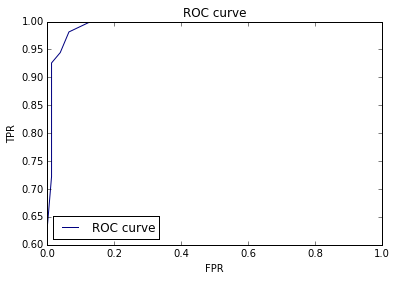

In [196]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
plt.plot(fpr, tpr, color='navy',
         label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc="lower left")
x = auc(fpr, tpr)
print ("AUC", x)

In [197]:
print ("SVC scores")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
alg=SVC(probability=True)
alg.fit(X_train, y_train)
y_pred_test = alg.predict(X_test)
accuracy= metrics.accuracy_score(y_test, y_pred_test)
#accuracy - correct predictions divided by total predictions.
print("Accuracy:", accuracy)
precision = metrics.precision_score(y_test, y_pred_test)
# precision - instances you correctly predicted positive divided by the total number of predicted positives
print("Precision:", precision)
recall = metrics.recall_score(y_test, y_pred_test)
#recall - instances you correctly predicted positive divided by the total number of actual positives
print("Recall score:", recall)
#f1- balancing precision vs recall
f1 = metrics.f1_score(y_test, y_pred_test)
print("F1_score:", f1)

SVC scores
Accuracy: 0.954198473282
Precision: 0.961538461538
Recall score: 0.925925925926
F1_score: 0.943396226415


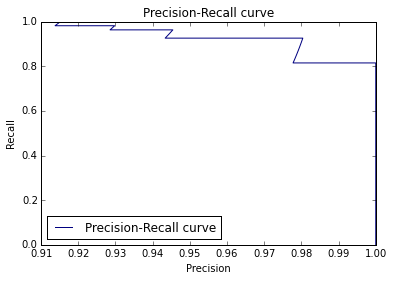

In [198]:
pred_proba = alg.predict_proba(X_test)
pred_proba
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[:,1])

# Plot Precision-Recall curve

plt.plot(precision, recall, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

AUC 0.994949494949


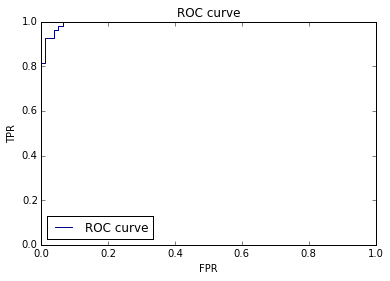

In [199]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
plt.plot(fpr, tpr, color='navy',
         label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc="lower left")
x = auc(fpr, tpr)
print ("AUC", x)

Exercise 6.3

Draw the Precision-Recall curve, ROC curve (and calculate AUC) for the logistic regression classifier from Exercise 5.12 in 05-Classification Challenge that uses Haberman Survival Dataset

In [200]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', na_values=['?'], header=None)
df.columns=['age_at_op','year_op','#_pos_aux_nodes','survival_status']

#    1. Age of patient at time of operation (numerical)
#    2. Patient's year of operation (year - 1900, numerical)
#    3. Number of positive axillary nodes detected (numerical)
#    4. Survival status (class attribute)

In [201]:
X=df.iloc[:,0:3]
y=df.iloc[:,3]
y[y==2]=0

In [202]:
print ("Logistic Regression scores")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
#accuracy - correct predictions divided by total predictions.
print("Accuracy:", accuracy)
precision = metrics.precision_score(y_test, y_pred_test)
# precision - instances you correctly predicted positive divided by the total number of predicted positives
print("Precision:", precision)
recall = metrics.recall_score(y_test, y_pred_test)
#recall - instances you correctly predicted positive divided by the total number of actual positives
print("Recall score:", recall)
#f1- balancing precision vs recall
f1 = metrics.f1_score(y_test, y_pred_test)
print("F1_score:", f1)

Logistic Regression scores
Accuracy: 0.815217391304
Precision: 0.813186813187
Recall score: 1.0
F1_score: 0.89696969697


In [203]:
pred_proba = logreg.predict_proba(X_test)
pred_proba
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[:,1])

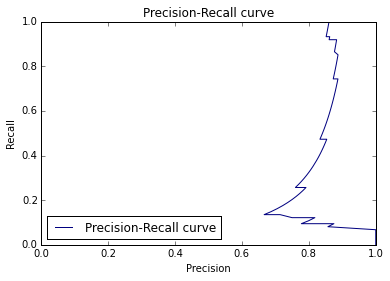

In [204]:
# Plot Precision-Recall curve

plt.plot(precision, recall, color='navy',
         label='Precision-Recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.xlim(0,1)
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

AUC 0.647522522523


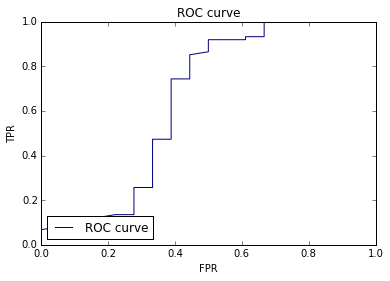

In [205]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
plt.plot(fpr, tpr, color='navy',
         label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc="lower left")
x = auc(fpr, tpr)
print ("AUC", x)